In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BA_customer_booking.csv', encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.shape

(50000, 14)

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## Sales Channel

In [6]:
# Calculate the percentage of bookings done through the internet
per_internet = (df.sales_channel.value_counts().values[0] / df.sales_channel.count()) * 100

# Calculate the percentage of bookings done through phone calls
per_mobile = (df.sales_channel.value_counts().values[1] / df.sales_channel.count()) * 100

# Print the results
print(f"Percentage of bookings done through the internet: {per_internet:.2f}%")
print(f"Percentage of bookings done through phone calls: {per_mobile:.2f}%")


Percentage of bookings done through the internet: 88.76%
Percentage of bookings done through phone calls: 11.24%


C:\Users\Mbder\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


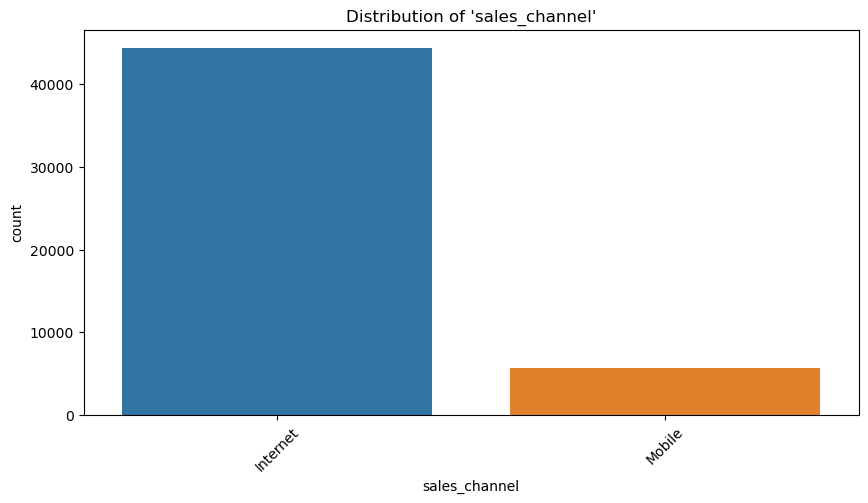

In [7]:
#Distribution of 'sales_channel'
plt.figure(figsize=(10, 5))
sns.countplot(df['sales_channel'])
plt.title("Distribution of 'sales_channel'")
plt.xticks(rotation=45)
plt.show()

## Trip Type

In [8]:
# Calculate the percentage of round trips
per_round = (df.trip_type.value_counts().values[0] / df.trip_type.count()) * 100

# Calculate the percentage of one-way trips
per_oneway = (df.trip_type.value_counts().values[1] / df.trip_type.count()) * 100

# Calculate the percentage of circle trips
per_circle = (df.trip_type.value_counts().values[2] / df.trip_type.count()) * 100

# Print the results
print(f"Percentage of round trips: {per_round:.2f}%")
print(f"Percentage of one-way trips: {per_oneway:.2f}%")
print(f"Percentage of circle trips: {per_circle:.2f}%")


Percentage of round trips: 98.99%
Percentage of one-way trips: 0.77%
Percentage of circle trips: 0.23%


C:\Users\Mbder\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


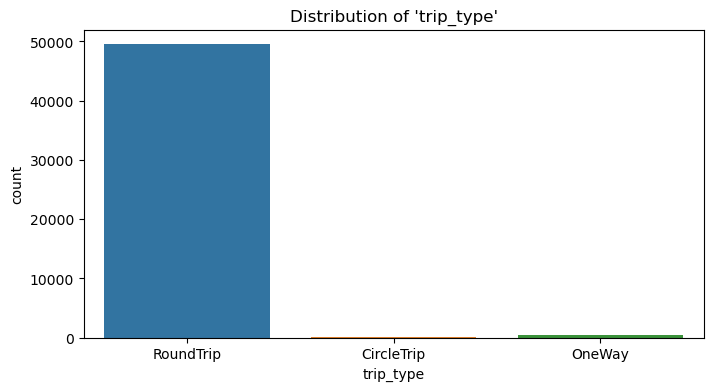

In [9]:
#Distribution of 'trip_type'
plt.figure(figsize=(8, 4))
sns.countplot(df['trip_type'])
plt.title("Distribution of 'trip_type'")
plt.show()

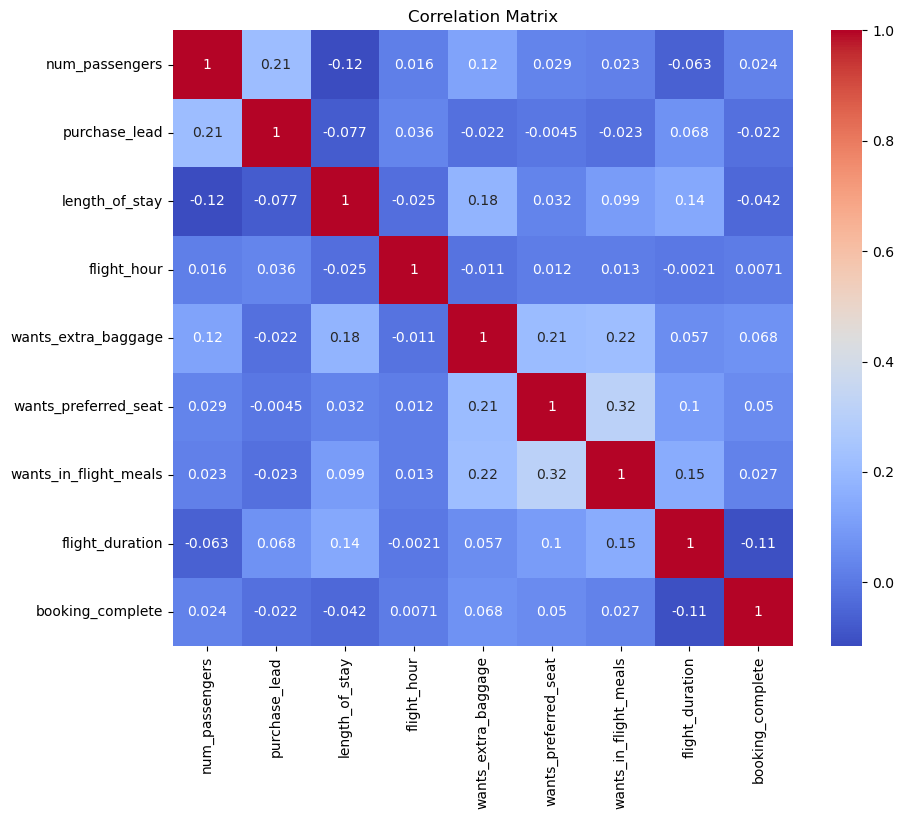

In [10]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Purchase Lead

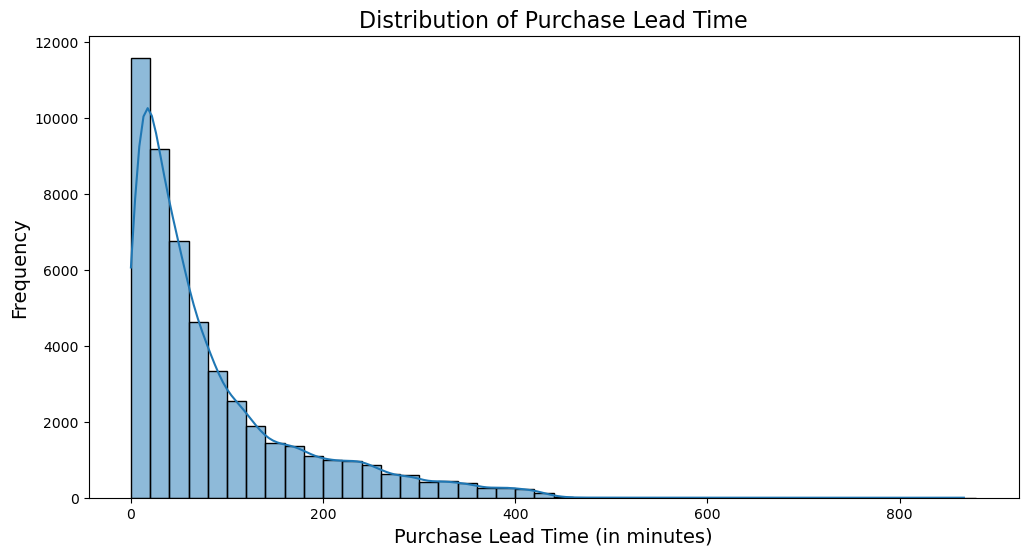

In [11]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a histogram with a kernel density estimate (KDE) for the 'purchase_lead' column
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True)

# Set labels for the x and y axes
plt.xlabel("Purchase Lead Time (in minutes)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Set the title for the plot
plt.title("Distribution of Purchase Lead Time", fontsize=16)

# Show the plot
plt.show()

There are some bookings that were made over 2 years before the travel date, which seems highly unusual. However, this could be due to factors like cancellations and rebookings within a period of 6 months, resulting in two bookings. Typically, airlines allow rebookings within a year. For our analysis, we'll treat these instances as outliers since they can significantly impact the results of predictive models.

In [12]:
#Count the occurrences where the 'purchase_lead' is greater than 600 (which indicates bookings made more than 600 days in advance)

(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

We will filter out all the entries with a `purchase_lead` greater than 600 days, assuming that customers typically don't book flights more than 1 and a half years in advance.

In [13]:
# Filter the DataFrame to remove entries with a purchase_lead greater than 600 days
filtered_df = df[df.purchase_lead > 600]
filtered_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


## Length Of Stay

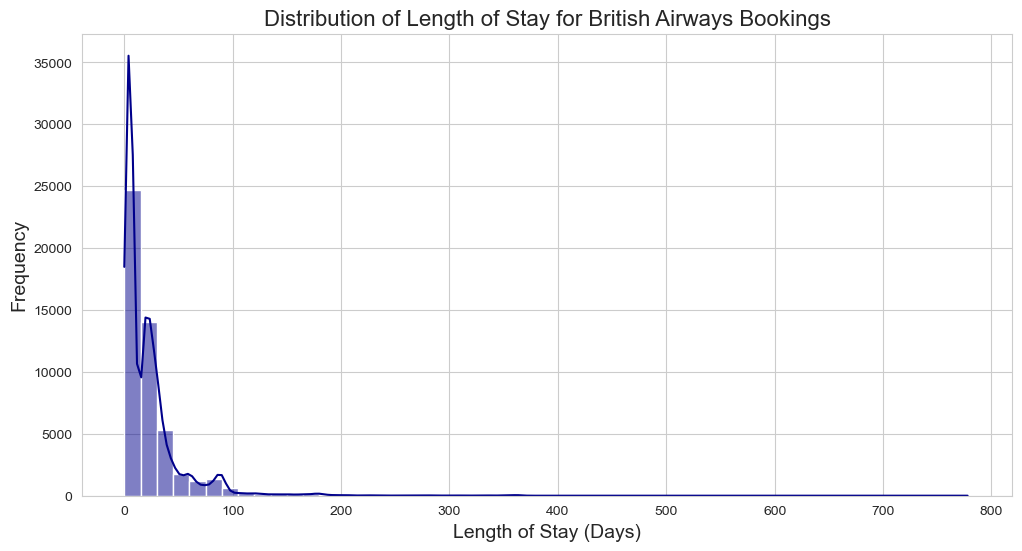

In [14]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a histogram plot for 'length_of_stay' with custom bin width and kernel density estimate (KDE)
sns.histplot(data=df, x="length_of_stay", binwidth=15, kde=True, color='darkblue')

# Customize the labels and title
plt.xlabel("Length of Stay (Days)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Length of Stay for British Airways Bookings", fontsize=16)

# Show the plot
plt.show()


In [15]:
# Count the number of entries in the DataFrame where 'length_of_stay' is greater than 200 days
value_counts = (df.length_of_stay > 200).value_counts()

# Print the result
print(value_counts)


False    49721
True       279
Name: length_of_stay, dtype: int64


In [16]:
# Filter the DataFrame for entries where 'length_of_stay' is greater than 500 days and then count the 'booking_complete' values
value_counts = df[df.length_of_stay > 500].booking_complete.value_counts()

# Print the result
print(value_counts)


0    9
1    1
Name: booking_complete, dtype: int64


The result indicates that for entries with a length of stay exceeding 500 days, there are 9 entries with a 'booking_complete' value of 0 and 1 entry with a 'booking_complete' value of 1.

C:\Users\Mbder\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


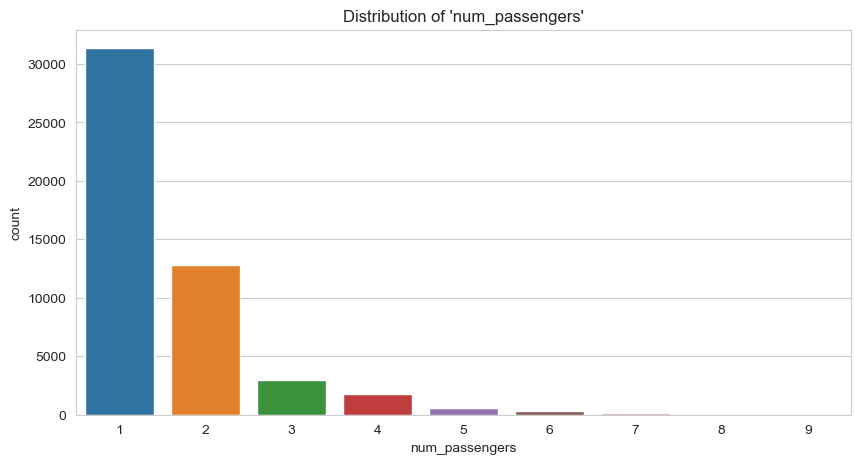

In [17]:
# Distribution of 'num_passengers'
plt.figure(figsize=(10, 5))
sns.countplot(df['num_passengers'])
plt.title("Distribution of 'num_passengers'")
plt.show();

C:\Users\Mbder\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


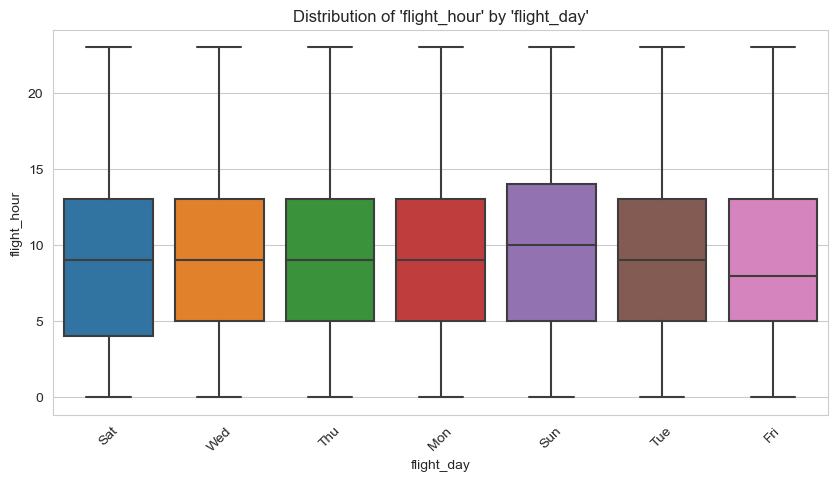

In [18]:
#Distribution of 'flight_hour' by 'flight_day'
plt.figure(figsize=(10, 5))
sns.boxplot(df['flight_day'], df['flight_hour'])
plt.title("Distribution of 'flight_hour' by 'flight_day'")
plt.xticks(rotation=45)
plt.show()

Most of the customers want to travel on Sunday and Saturday and choose Friday as least preffered day as flight day.

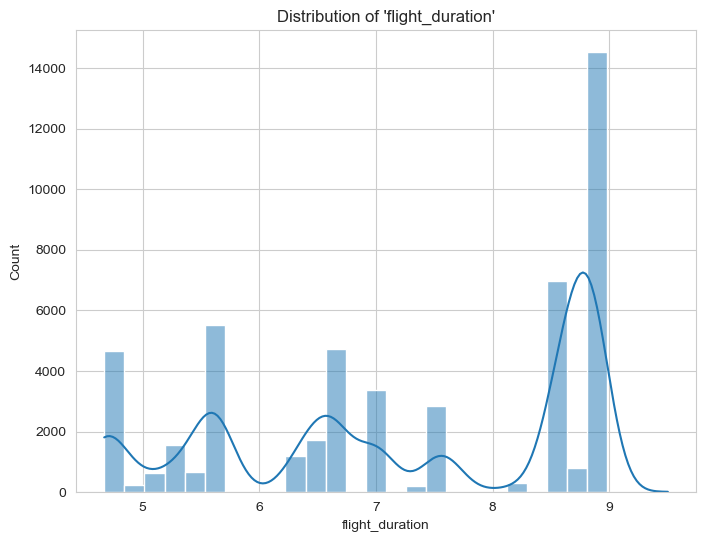

In [19]:
#Distribution of 'flight_duration'
plt.figure(figsize=(8, 6))
sns.histplot(df['flight_duration'], kde=True)
plt.title("Distribution of 'flight_duration'")
plt.show()

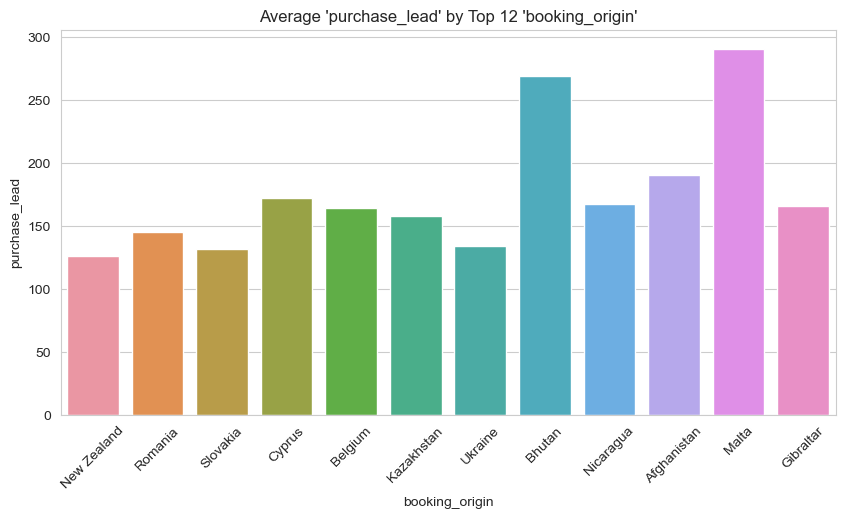

In [33]:
# Average 'purchase_lead' by 'booking_origin' and select the top 12
top_12_booking_origin = df.groupby('booking_origin')['purchase_lead'].mean().nlargest(12).index

plt.figure(figsize=(10, 5))
sns.barplot(x=df[df['booking_origin'].isin(top_12_booking_origin)]['booking_origin'], y=df['purchase_lead'], ci=None)
plt.title("Average 'purchase_lead' by Top 12 'booking_origin'")
plt.xticks(rotation=45)
plt.show()


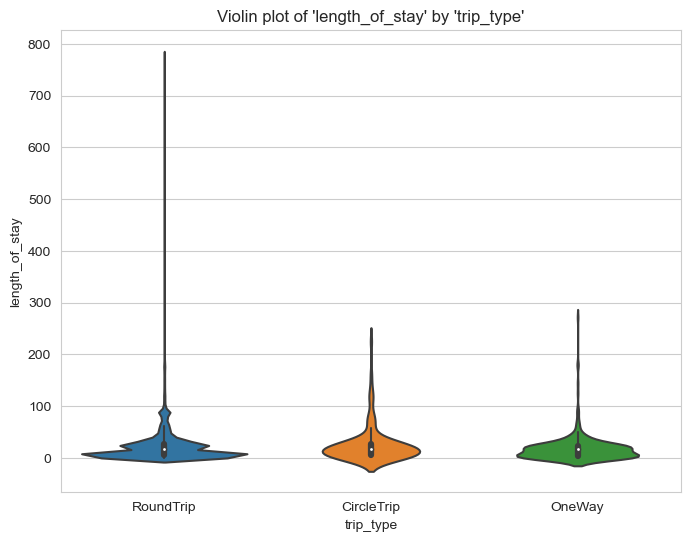

In [25]:
#Violin plot of 'length_of_stay' by 'trip_type'
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['trip_type'], y=df['length_of_stay'])
plt.title("Violin plot of 'length_of_stay' by 'trip_type'")
plt.show()

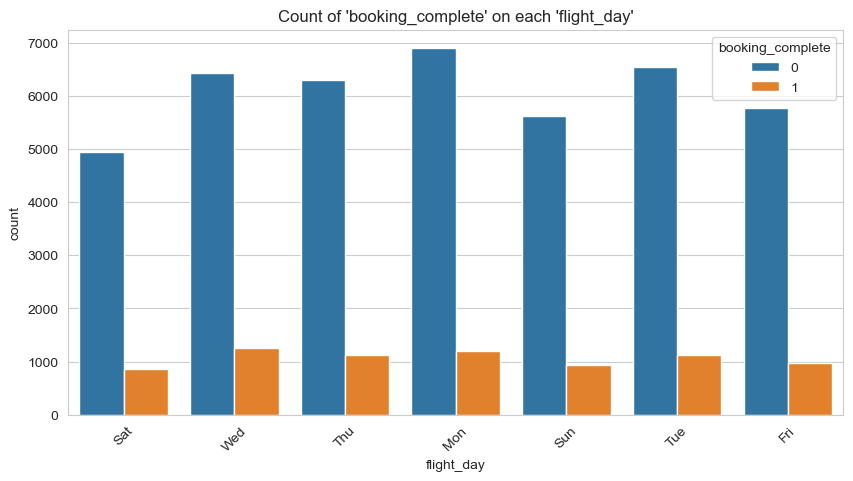

In [30]:
#Count of 'booking_complete' on each 'flight_day'
plt.figure(figsize=(10, 5))
sns.countplot(x=df['flight_day'], hue=df['booking_complete'])
plt.title("Count of 'booking_complete' on each 'flight_day'")
plt.xticks(rotation=45)
plt.show()

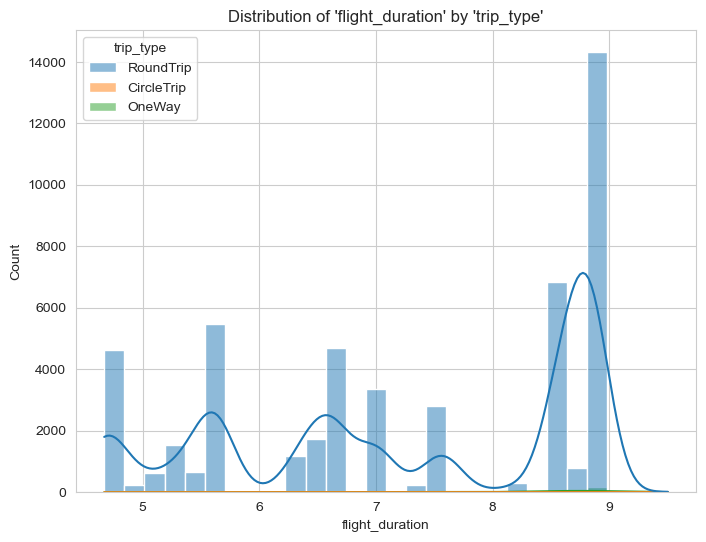

In [29]:
#Distribution of 'flight_duration' by 'trip_type'
plt.figure(figsize=(8, 6))
sns.histplot(df, x='flight_duration', hue='trip_type', kde=True)
plt.title("Distribution of 'flight_duration' by 'trip_type'")
plt.show()

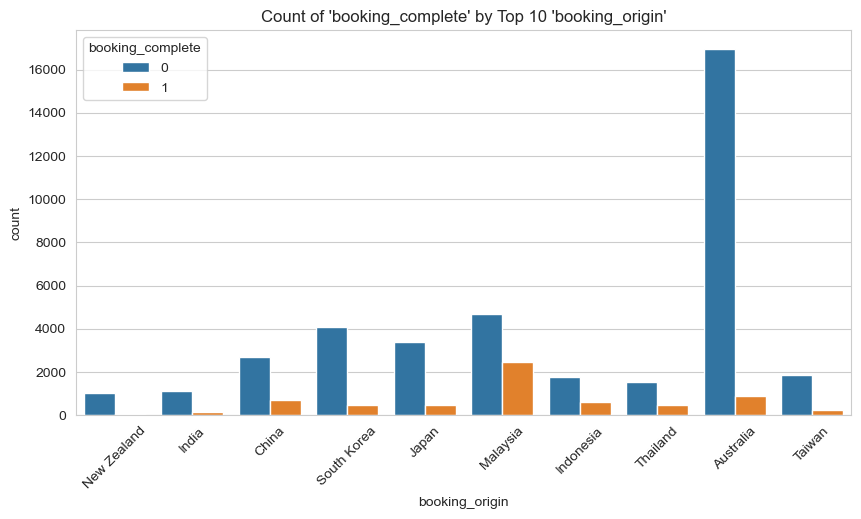

In [32]:
# Count of 'booking_complete' by 'booking_origin' and select the top 10
top_10_booking_origin = df['booking_origin'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 5))
sns.countplot(x=df[df['booking_origin'].isin(top_10_booking_origin)]['booking_origin'], hue=df['booking_complete'])
plt.title("Count of 'booking_complete' by Top 10 'booking_origin'")
plt.xticks(rotation=45)
plt.show()


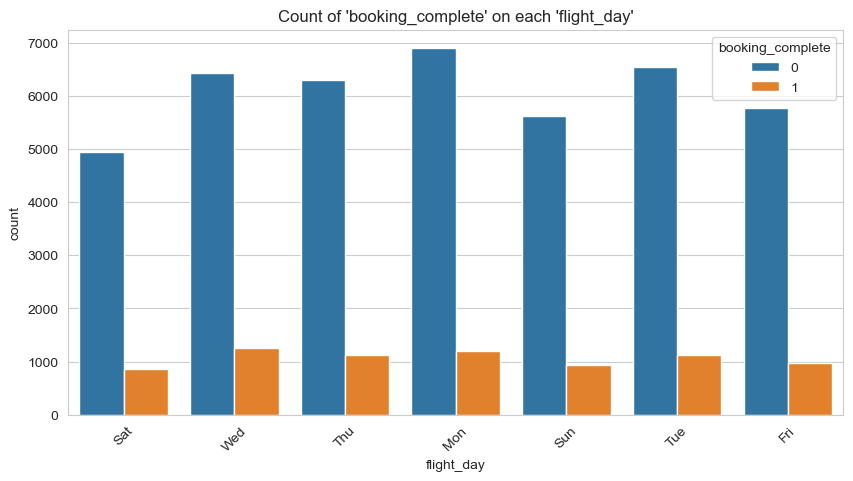

In [35]:
#Count of 'booking_complete' on each 'flight_day'
plt.figure(figsize=(10, 5))
sns.countplot(x=df['flight_day'], hue=df['booking_complete'])
plt.title("Count of 'booking_complete' on each 'flight_day'")
plt.xticks(rotation=45)
plt.show()


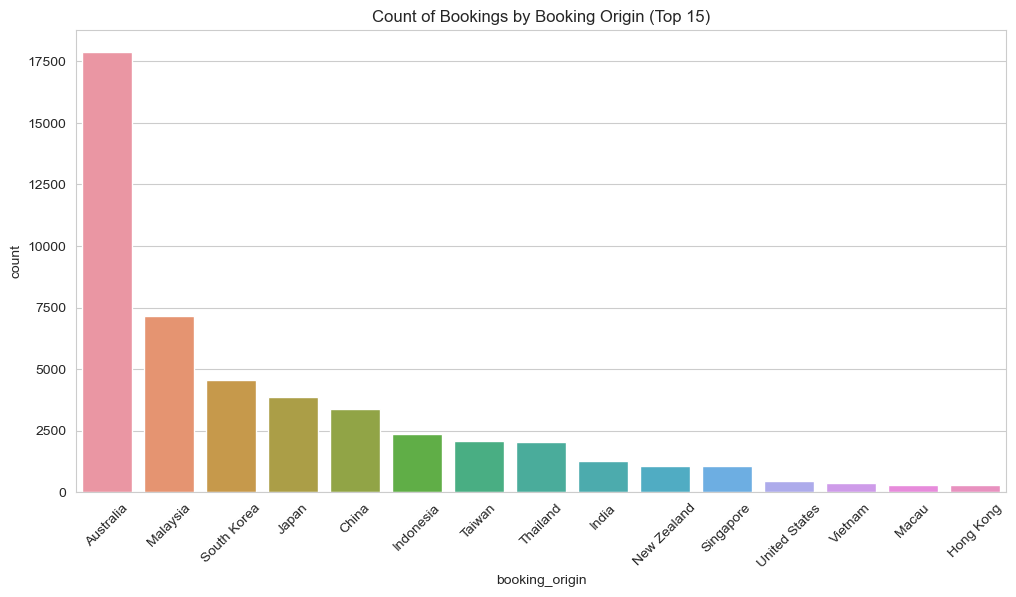

In [42]:
# Count of Bookings by Booking Origin (Top 15)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='booking_origin', order=df['booking_origin'].value_counts().index[:15])
plt.title("Count of Bookings by Booking Origin (Top 15)")
plt.xticks(rotation=45)
plt.show()


Above chart shows travellers from which country had maximum booking applications.

In [48]:
# Calculate the number of successful bookings
successful_bookings = (df['booking_complete'] == 1).sum()

# Calculate the number of unsuccessful bookings
unsuccessful_bookings = (df['booking_complete'] == 0).sum()

# Calculate the percentage of successful and unsuccessful bookings
successful_percentage = (successful_bookings / len(df)) * 100
unsuccessful_percentage = (unsuccessful_bookings / len(df)) * 100

# Print the results
print(f"Out of 50000 booking entries, {round(successful_percentage, 2)}% were successful or complete.")
print(f"{round(unsuccessful_percentage, 2)}% were unsuccessful.")


Out of 50000 booking entries, 14.96% were successful or complete.
85.04% were unsuccessful.


## Export the dataset to csv

In [51]:
import os

# Get the current working directory
cwd = os.getcwd()



In [52]:
# Define the file path for the CSV file
csv_file_path = os.path.join(cwd, "customer_booking(EDA).csv")

# Save the DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)


In [53]:
# Print the file path for confirmation
print(f"DataFrame saved to: {csv_file_path}")

DataFrame saved to: C:\Users\Mbder\customer_booking(EDA).csv
